# House Prices

## Imports and Dataset start

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')
df_total = pd.concat((df_train, df_test)).reset_index(drop = True)

In [3]:
pd.set_option('display.max_columns', None)

df_total.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## Exploratory Analysis

### Sorted Correlation

In [4]:
df_corr = df_total.corr()
ordenado = df_corr.sum().sort_values(ascending=True).index.values
df_corr_sorted = df_corr[ordenado].corr()

In [5]:
df_corr_sorted

OverallCond  EnclosedPorch        Id    YrSold  MSSubClass  \
OverallCond       1.000000       0.324002  0.035459  0.086348   -0.051945   
EnclosedPorch     0.324002       1.000000  0.071903  0.007164   -0.021750   
Id                0.035459       0.071903  1.000000 -0.469851    0.021635   
YrSold            0.086348       0.007164 -0.469851  1.000000   -0.011354   
MSSubClass       -0.051945      -0.021750  0.021635 -0.011354    1.000000   
BsmtHalfBath      0.225762       0.048816  0.030430 -0.045544   -0.063964   
LowQualFinSF      0.107771       0.266604 -0.065436 -0.011662    0.040991   
KitchenAbvGr     -0.084283       0.181550 -0.019459  0.032646    0.378611   
BsmtFinSF2        0.148721       0.093397  0.033773  0.015432   -0.201854   
3SsnPorch         0.073522      -0.074521 -0.113816  0.042512   -0.114262   
MoSold           -0.026128      -0.049614  0.026820 -0.315732   -0.016673   
MiscVal           0.068566       0.028974 -0.011013 -0.009150   -0.112648   
ScreenPorch       0.081248      -0.075753  0.013393 -0.051070   -0.183854   
PoolArea         -0.027474       0.157772 -0.000227 -0.137315   -0.132287   
BsmtUnfSF        -0.346247      -0.108361 -0.071325 -0.117003   -0.201699   
BsmtFullBath     -0.169985      -0.284079 -0.066360  0.043592   -0.179196   
BedroomAbvGr     -0.107215       0.110802 -0.072378 -0.119126    0.059422   
LotArea          -0.166644      -0.041585 -0.145322 -0.103265   -0.549626   
HalfBath         -0.265923      -0.256281 -0.111362 -0.080767    0.333570   
2ndFlrSF         -0.098063       0.003244 -0.092459 -0.098710    0.442273   
WoodDeckSF       -0.200520      -0.412165 -0.122316 -0.076127   -0.168935   
OpenPorchSF      -0.353810      -0.318617 -0.092637 -0.160873   -0.128081   
BsmtFinSF1       -0.237999      -0.349897 -0.104153 -0.011834   -0.293441   
LotFrontage      -0.288067      -0.123455 -0.145933 -0.105050   -0.702716   
MasVnrArea       -0.477335      -0.439062 -0.158765 -0.121065   -0.181424   
YearRemodAdd     -0.364941      -0.623325 -0.178571 -0.046626   -0.021711   
Fireplaces       -0.275190      -0.226238 -0.176931 -0.118123   -0.290539   
YearBuilt        -0.639790      -0.708501 -0.125195 -0.080558   -0.054566   
GarageYrBlt      -0.627186      -0.670436 -0.134769 -0.078886    0.008600   
FullBath         -0.572962      -0.439389 -0.158952 -0.133550    0.072961   
TotalBsmtSF      -0.486036      -0.402361 -0.151608 -0.107688   -0.500053   
1stFlrSF         -0.455894      -0.336314 -0.143194 -0.118983   -0.537100   
TotRmsAbvGrd     -0.349692      -0.122267 -0.165775 -0.162278   -0.003346   
GarageArea       -0.533281      -0.484864 -0.150970 -0.126996   -0.283337   
GarageCars       -0.556069      -0.511161 -0.151016 -0.132580   -0.199301   
OverallQual      -0.495227      -0.531546 -0.174993 -0.131432   -0.130879   
SalePrice        -0.473629      -0.484685 -0.182352 -0.152222   -0.247831   
GrLivArea        -0.435187      -0.246954 -0.192686 -0.175323   -0.059689   

               BsmtHalfBath  LowQualFinSF  KitchenAbvGr  BsmtFinSF2  \
OverallCond        0.225762      0.107771     -0.084283    0.148721   
EnclosedPorch      0.048816      0.266604      0.181550    0.093397   
Id                 0.030430     -0.065436     -0.019459    0.033773   
YrSold            -0.045544     -0.011662      0.032646    0.015432   
MSSubClass        -0.063964      0.040991      0.378611   -0.201854   
BsmtHalfBath       1.000000     -0.032556     -0.142481    0.198862   
LowQualFinSF      -0.032556      1.000000      0.097370   -0.036168   
KitchenAbvGr      -0.142481      0.097370      1.000000   -0.132926   
BsmtFinSF2         0.198862     -0.036168     -0.132926    1.000000   
3SsnPorch          0.029668     -0.055619     -0.105733   -0.055738   
MoSold             0.002744     -0.008603      0.037538   -0.065450   
MiscVal            0.049366     -0.042371      0.005669   -0.022300   
ScreenPorch        0.063695     -0.034298     -0.164741    0.121552   
PoolArea         

### Matriz de Correlação

In [6]:
#HeatMap is cutting off the first and the last box.
def fixheatmap():
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    return plt.ylim(b, t) # update the ylim(bottom, top) values

(38.5, -0.5)

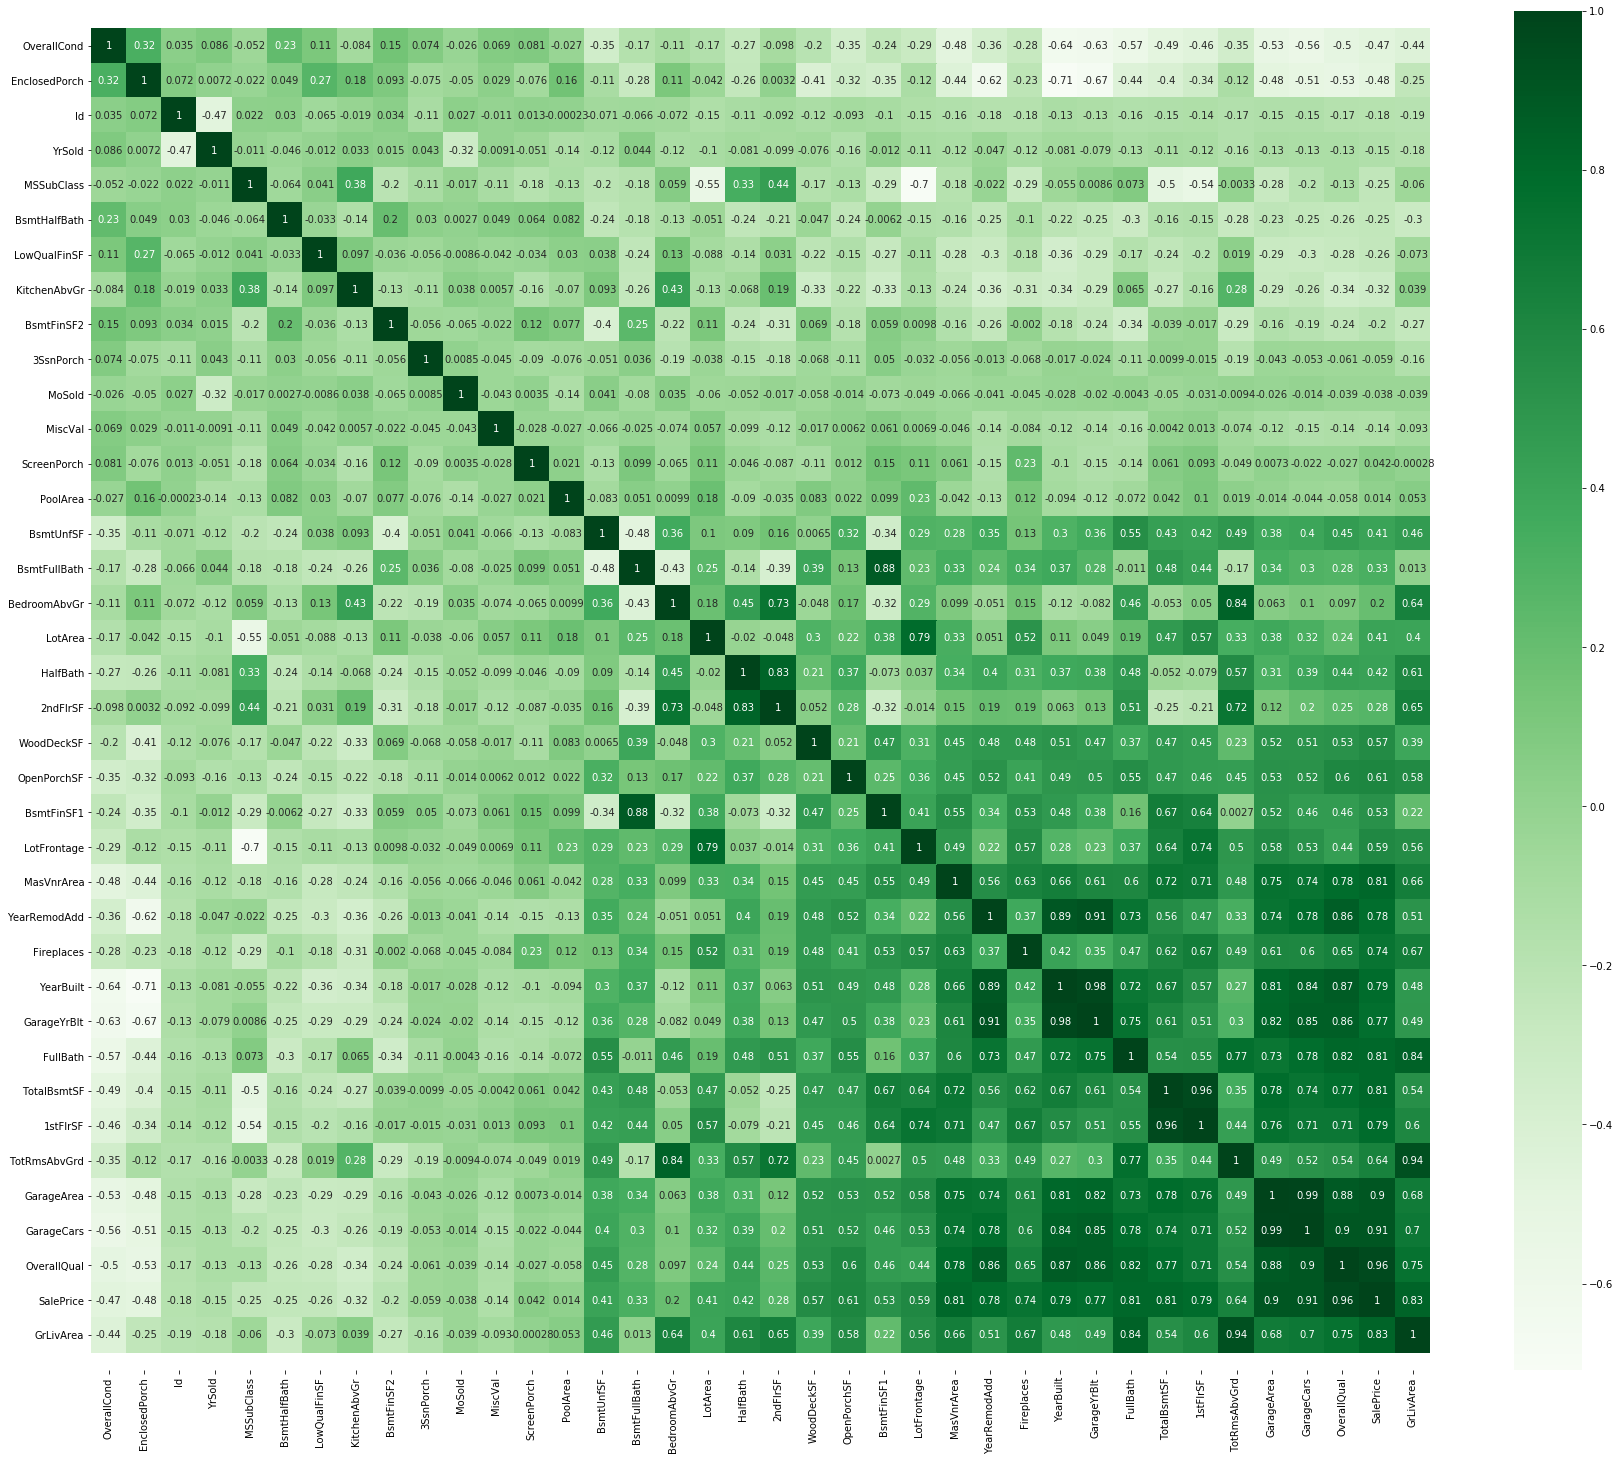

In [7]:
plt.figure(figsize=(30, 25))
plt.autoscale,
sns.heatmap(df_corr_sorted, annot=True, cmap="Greens");
fixheatmap()

(10.5, -0.5)

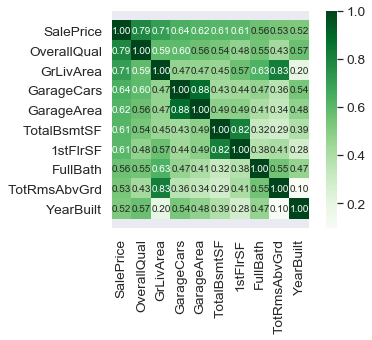

In [8]:
k = 10 #number of variables for heatmap
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values, cmap="Greens")
fixheatmap()

In [9]:
PositiveCorr = df_total.corr().nlargest(k, 'SalePrice')['SalePrice'].index

(10.5, -0.5)

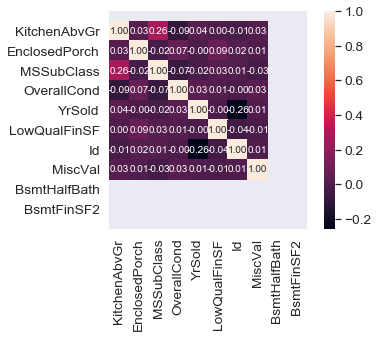

In [10]:
cols = df_total.corr().nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_total[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values)
fixheatmap()

In [11]:
NegativeCorr = cols = df_total.corr().nsmallest(3, 'SalePrice')['SalePrice'].index

### ScatterPlots

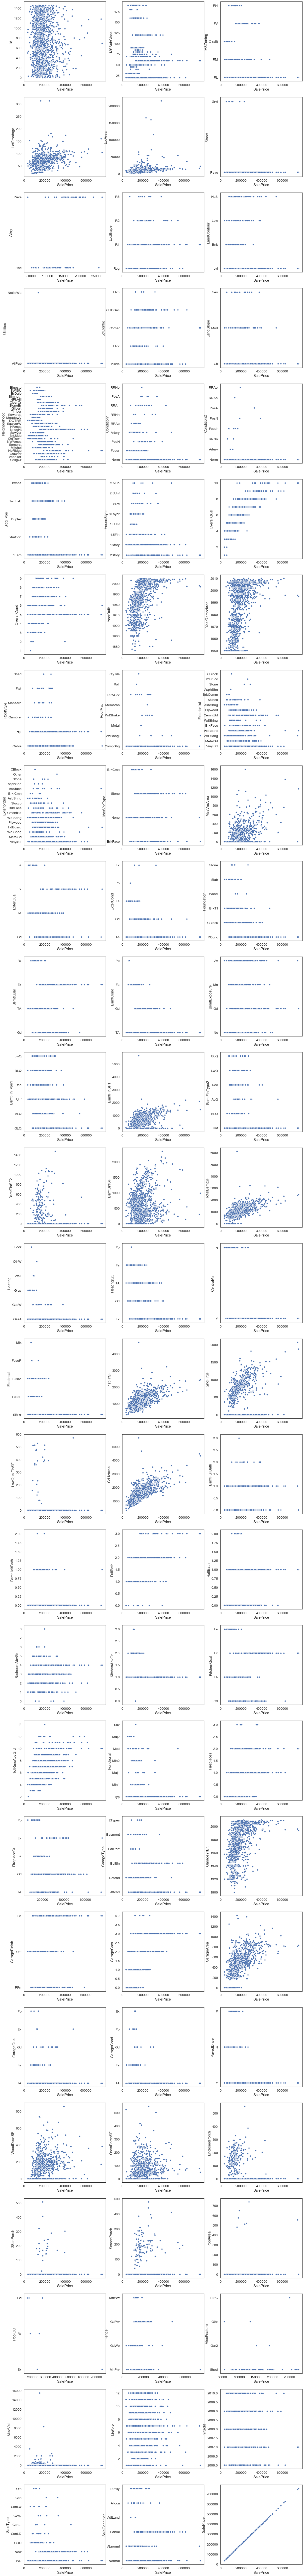

In [12]:
import math
def scatterplots(df, x, ncols):
    size = df.columns.values.size
    variables = df.columns.values
    nrows = math.ceil(size/ncols)
    height = nrows*7
    sns.set_style('white')
    fig, ax = plt.subplots(figsize=(20,height), ncols=ncols, nrows=nrows)
    position = 0
    for line in range(nrows):
        for column in range(ncols):
            sns.scatterplot(x, variables[position], data = df, ax=ax[line][column])
            position += 1
            
scatterplots(df_total, 'SalePrice', 3)

In [13]:
df_total['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

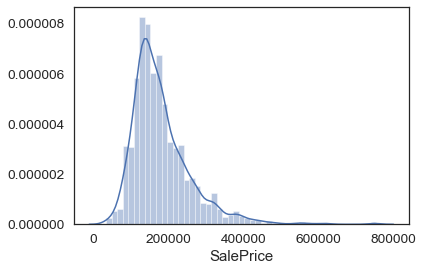

In [14]:
sns.distplot(df_total['SalePrice'])

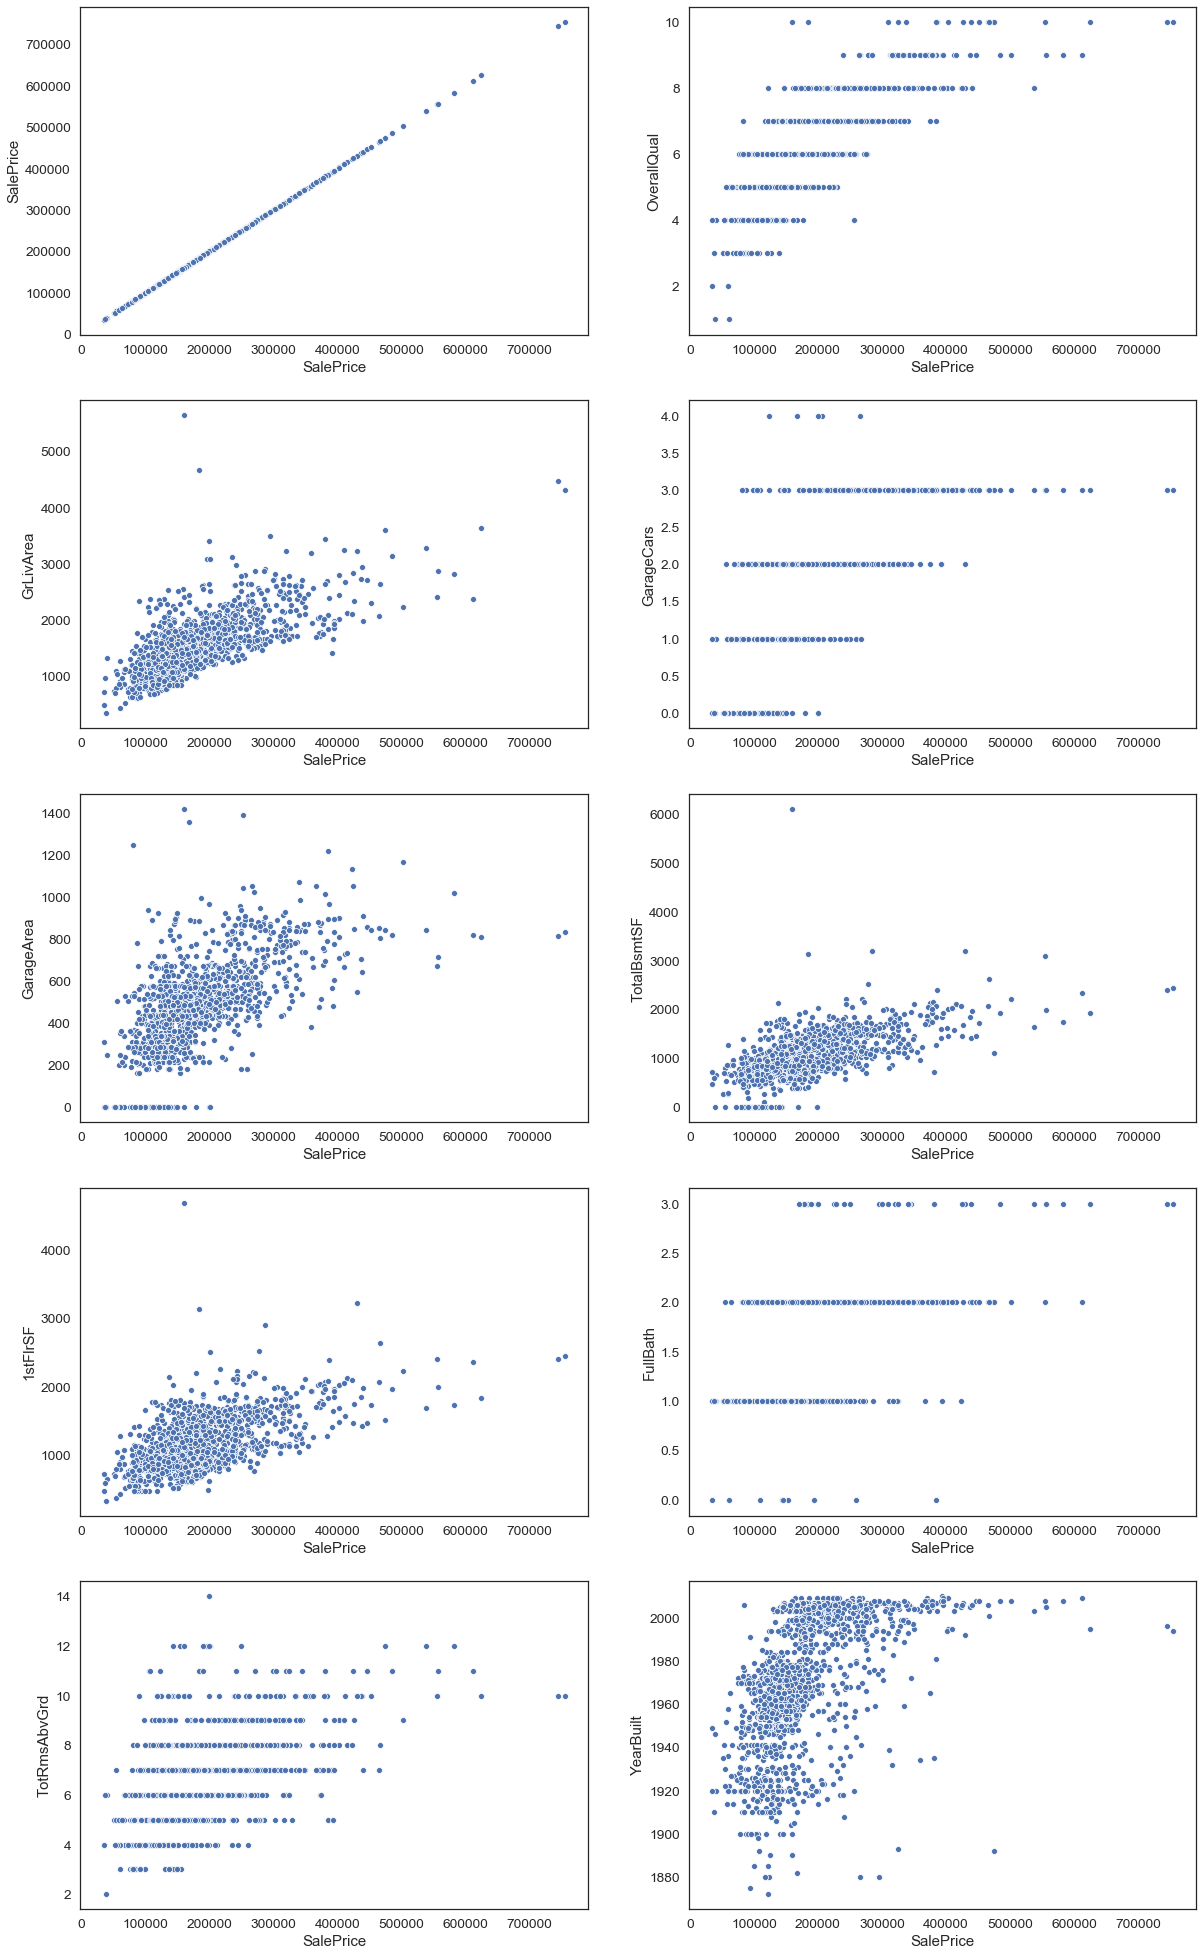

In [15]:
scatterplots(df_total[PositiveCorr], 'SalePrice', 2)

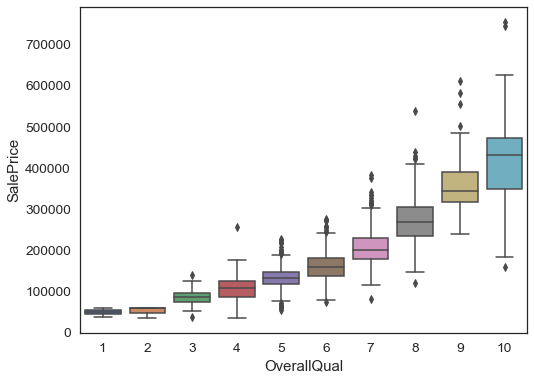

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=df_total)

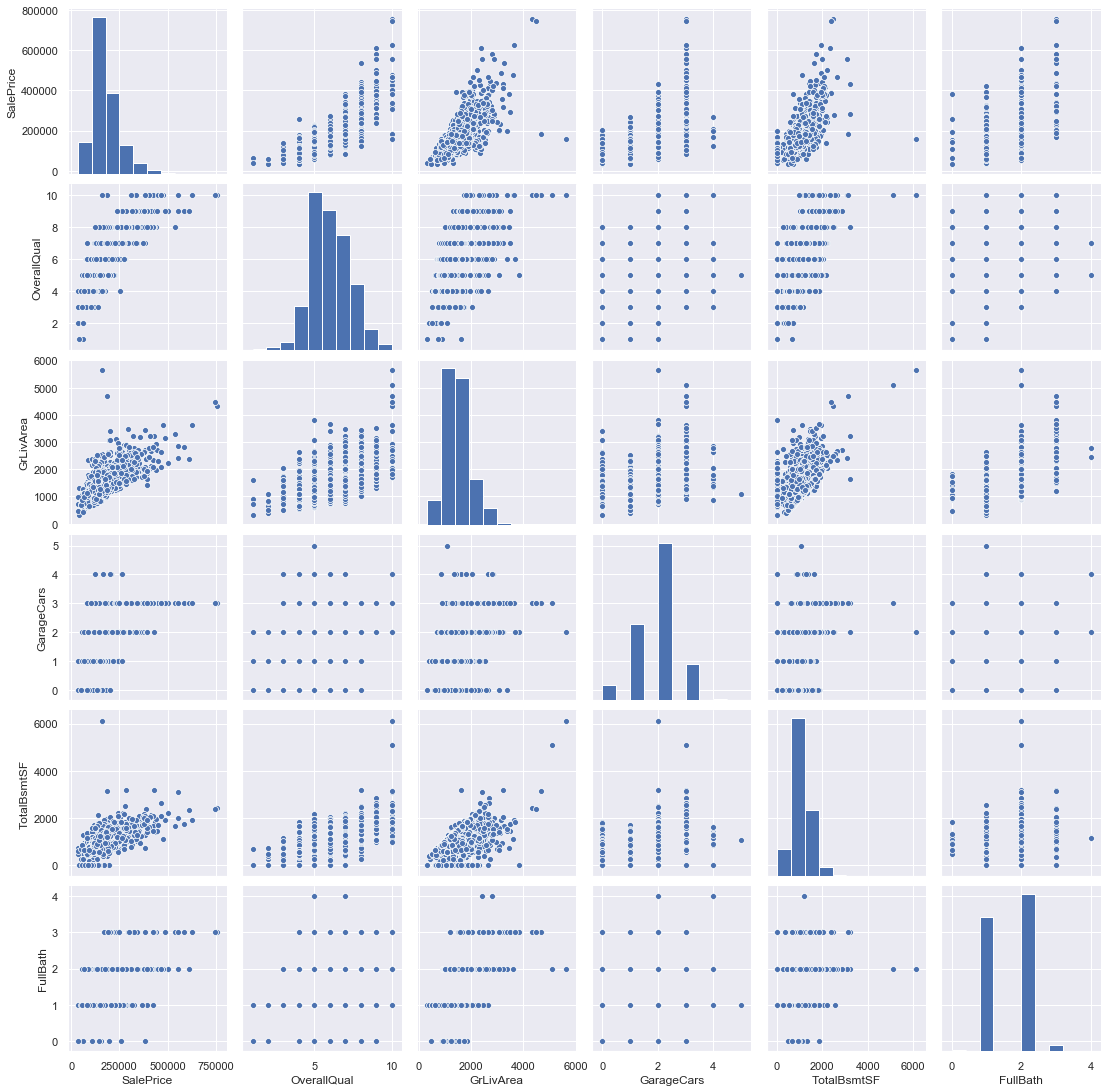

In [17]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(df_total[cols], size = 2.5)

## PreProcessing

In [18]:
# Some numeric variables that were behavig like categorical ones

df_total['MSSubClass'] = df_total['MSSubClass'].astype(str)
df_total['YrSold'] = df_total['YrSold'].astype(str)
df_total['MoSold'] = df_total['MoSold'].astype(str)
df_total['YearBuilt'] = df_total['YearBuilt'].astype(str)
df_total['YearRemodAdd'] = df_total['YearRemodAdd'].astype(str)
df_total['GarageYrBlt'] = df_total['GarageYrBlt'].astype(str)

In [19]:
PositiveCorr = df_total.select_dtypes(exclude = 'object').corr().nlargest(k, 'SalePrice')['SalePrice'].index

### Missing Values

In [20]:
def missingvalues(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data.Total != 0]

missingvalues(df_total)

Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
SalePrice      1459  0.499829
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageQual      159  0.054471
GarageFinish    159  0.054471
GarageCond      159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
Utilities         2  0.000685
Functional        2  0.000685
BsmtFullBath      2  0.000685
BsmtHalfBath      2  0.000685
GarageArea        1  0.000343
BsmtFinSF2        1  0.000343
Exterior1st       1  0.000343
Exterior2nd       1  0.000343
GarageCars        1  0.000343
TotalBsmtSF       1  0.000343
BsmtUnfSF         1  0.000343
BsmtFinSF1        1  0.000343
KitchenQual       1  0.000343
SaleType          1  0.000343
Electrical        1  0.000343

In [21]:
missing_data = missingvalues(df_total)
df_total = df_total.drop((missing_data[(missing_data['Total'] > 1) & (~missing_data.index.isin(cols))]).index,1)
missingvalues(df_total)

Total   Percent
SalePrice     1459  0.499829
GarageArea       1  0.000343
TotalBsmtSF      1  0.000343
BsmtFinSF1       1  0.000343
Electrical       1  0.000343
Exterior2nd      1  0.000343
Exterior1st      1  0.000343
KitchenQual      1  0.000343
BsmtFinSF2       1  0.000343
GarageCars       1  0.000343
BsmtUnfSF        1  0.000343
SaleType         1  0.000343

In [22]:
#Now we start doing something with that missing values left

unique, counts = np.unique(np.where(df_total.drop('SalePrice', 1).isnull())[0], return_counts=True)
dict(zip(unique, counts))

{1379: 1, 1555: 1, 2120: 4, 2151: 2, 2489: 1, 2576: 2}

In [23]:
df_total = df_total.drop({2120,2151,2576})
missingvalues(df_total)

Total   Percent
SalePrice     1456  0.499314
SaleType         1  0.000343
Electrical       1  0.000343
KitchenQual      1  0.000343

In [24]:
df_total['SaleType'] = df_total['SaleType'].fillna(df_total['SaleType'].mode()[0])
df_total['KitchenQual'] = df_total['KitchenQual'].fillna("TA") 
df_total['Electrical'] = df_total['Electrical'].fillna("SBrkr")
missingvalues(df_total)

Total   Percent
SalePrice   1456  0.499314

### Check Heteroscedasticity of our best cols

In [25]:
def residplots(df, x, ncols):
    size = df.columns.values.size
    variables = df.columns.values
    nrows = math.ceil(size/ncols)
    height = nrows*7
    sns.set_style('white')
    fig, ax = plt.subplots(figsize=(20,height), ncols=ncols, nrows=nrows)
    position = 0
    for line in range(nrows):
        for column in range(ncols):
            if position == size: break
            sns.residplot(x, variables[position], data = df, ax=ax[line][column])
            position += 1

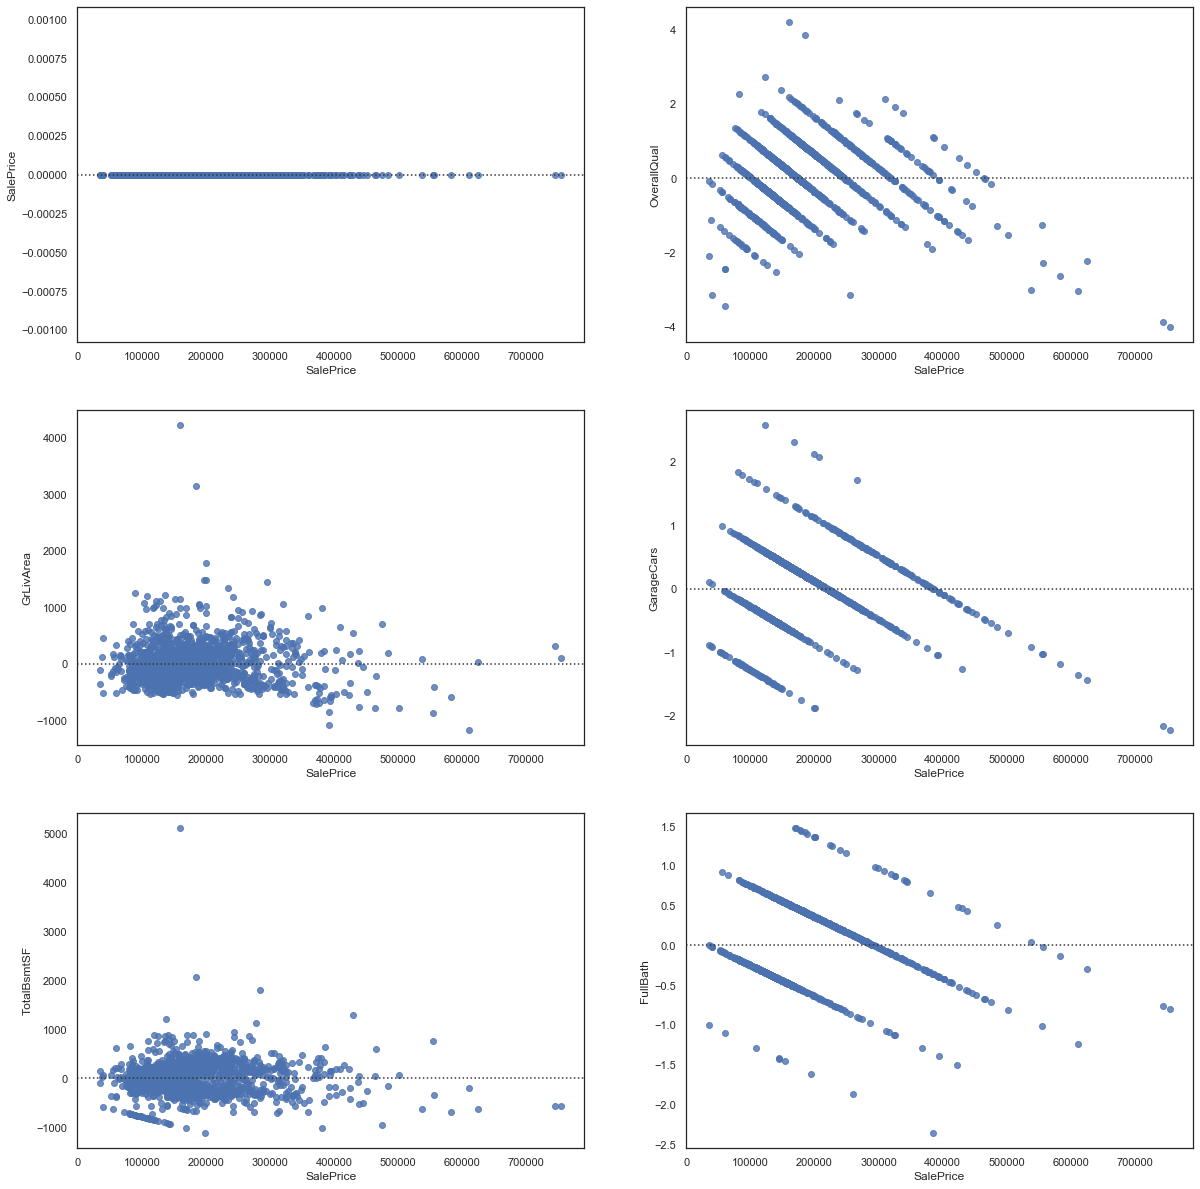

In [26]:
residplots(df_total[cols], 'SalePrice', 2)

### Fixing Skewness

In [27]:
df_total.drop(['SalePrice'], axis = 1, inplace = True)

In [28]:
#Removing Skewness (dataframe 'Standarizating')
#from sklearn.preprocessing import StandardScaler
#df_test = df_total[~df_total.SalePrice.isna()]
#saleprice_scaled = StandardScaler().fit_transform(df_test['SalePrice'][:,np.newaxis])
#saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
#couldn't make it work

from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [29]:
numeric_cols = df_total.dtypes[df_total.dtypes != "object"].index
skewed_cols = df_total[numeric_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_cols

MiscVal          21.935910
PoolArea         16.889551
LotArea          12.827199
LowQualFinSF     12.082427
3SsnPorch        11.370087
KitchenAbvGr      4.299698
BsmtFinSF2        4.143683
EnclosedPorch     4.013795
ScreenPorch       3.944305
OpenPorchSF       2.533783
WoodDeckSF        1.842227
1stFlrSF          1.469632
BsmtFinSF1        1.426604
GrLivArea         1.269875
TotalBsmtSF       1.163081
BsmtUnfSF         0.918630
2ndFlrSF          0.861819
TotRmsAbvGrd      0.758029
Fireplaces        0.732902
HalfBath          0.692934
OverallCond       0.572605
BedroomAbvGr      0.325334
GarageArea        0.242495
OverallQual       0.195671
FullBath          0.167024
Id                0.001861
GarageCars       -0.217688
dtype: float64

In [30]:
## Fixing Skewed columns using boxcox transformation. 

def fixing_skewness(df):
    
    ## Getting all the data that are not of "object" type. 
    numeric_feats = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

fixing_skewness(df_total)

In [31]:
skewed_cols = df_total[numeric_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_cols

PoolArea         14.978231
3SsnPorch         8.860495
LowQualFinSF      8.491121
MiscVal           5.237027
KitchenAbvGr      3.777556
ScreenPorch       3.151992
BsmtFinSF2        2.577759
EnclosedPorch     2.152144
2ndFlrSF          0.894294
WoodDeckSF        0.784399
HalfBath          0.729290
OpenPorchSF       0.620557
Fireplaces        0.553844
OverallCond       0.383722
BsmtFinSF1        0.374654
TotalBsmtSF       0.369946
BedroomAbvGr      0.325334
GarageArea        0.242495
OverallQual       0.195671
FullBath          0.167024
BsmtUnfSF         0.053744
TotRmsAbvGrd      0.047199
GrLivArea         0.004820
Id                0.001861
1stFlrSF         -0.011635
LotArea          -0.136059
GarageCars       -0.217688
dtype: float64

In [32]:
df_total[numeric_cols].kurtosis().sort_values(ascending=False)

PoolArea         223.613722
3SsnPorch         77.420765
LowQualFinSF      70.878673
MiscVal           26.359352
KitchenAbvGr      19.415225
ScreenPorch        8.611335
BsmtFinSF2         5.032650
TotalBsmtSF        4.704323
LotArea            4.529233
EnclosedPorch      3.117374
BedroomAbvGr       1.942158
OverallCond        1.756517
GarageArea         0.943058
TotRmsAbvGrd       0.320745
GarageCars         0.240885
GrLivArea          0.212525
1stFlrSF           0.129117
OverallQual        0.068486
WoodDeckSF        -0.193444
2ndFlrSF          -0.308714
BsmtFinSF1        -0.368882
BsmtUnfSF         -0.454798
OpenPorchSF       -0.465730
Fireplaces        -0.534642
FullBath          -0.537249
HalfBath          -0.852231
Id                -1.199429
dtype: float64

# IMPORTANTE! TO PLANEJANDO TESTAR COM AS COLUNAS QUE TEM KURTOSIS < 7 E SKWENESS < 2 > -2

In [33]:
def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [34]:
outliers_z_score(df_total['OverallQual'])

(array([ 375,  533, 2214, 2901], dtype=int64),)

In [36]:
df_total[df_total.index.isin({375,  533, 2214, 2901})]['OverallQual']

375     1
533     1
2214    5
2901    6
Name: OverallQual, dtype: int64

In [37]:
cols.remove('SalePrice')

In [39]:
np.isinf(df_total.values.any())

False

In [48]:
PositiveCorr = PositiveCorr.drop(['MasVnrArea', 'SalePrice'])

In [108]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=.1, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(df_total[numeric_cols])
pred = clf.predict(df_total[numeric_cols])
df_total['anomaly']=pred
outliers=df_total.loc[df_total['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
#clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
#preds = clf.fit_predict(df_total[numeric_cols])
#preds
df_total[df_total.anomaly == -1]

Id MSSubClass    LotArea Street LotShape LandContour LotConfig  \
5        6         50  14.525442   Pave      IR1         Lvl    Inside   
7        8         60  13.859583   Pave      IR1         Lvl    Corner   
8        9         50  12.752612   Pave      Reg         Lvl    Inside   
11      12         60  14.157689   Pave      IR1         Lvl    Inside   
17      18         90  13.942419   Pave      Reg         Lvl    Inside   
...    ...        ...        ...    ...      ...         ...       ...   
2875  2876         70  13.029450   Pave      Reg         Lvl    Inside   
2885  2886         60  14.745951   Pave      Reg         Lvl    Inside   
2891  2892         30  14.236608   Pave      Reg         Lvl    Inside   
2904  2905         20  16.328592   Pave      Reg         Lvl    Inside   
2908  2909         90  14.141656   Pave      IR1         Lvl    Corner   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
5          Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin   
7          Gtl       NWAmes       PosN       Norm     1Fam     2Story   
8          Gtl      OldTown     Artery       Norm     1Fam     1.5Fin   
11         Gtl      NridgHt       Norm       Norm     1Fam     2Story   
17         Gtl       Sawyer       Norm       Norm   Duplex     1Story   
...        ...          ...        ...        ...      ...        ...   
2875       Gtl        SWISU      Feedr       Norm     1Fam     2Story   
2885       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
2891       Gtl       IDOTRR      Feedr       Norm     1Fam     1Story   
2904       Gtl      Mitchel     Artery       Norm     1Fam     1Story   
2908       Gtl      Mitchel       Norm       Norm   Duplex     1Story   

      OverallQual  OverallCond YearBuilt YearRemodAdd RoofStyle RoofMatl  \
5               5     3.983728      1993         1995     Gable  CompShg   
7               7     4.669436      1973         1973     Gable  CompShg   
8               7     3.983728      1931         1950     Gable  CompShg   
11              9     3.983728      2005         2006       Hip  CompShg   
17              4     3.983728      1967         1967     Gable  CompShg   
...           ...          ...       ...          ...       ...      ...   
2875            7     5.985122      1926         1997     Gable  CompShg   
2885            5     5.335595      1950         1963     Gable  CompShg   
2891            3     3.983728      1945         1950     Gable  CompShg   
2904            1     2.535760      1951         1951     Gable  CompShg   
2908            5     3.983728      1970         1970     Gable  CompShg   

     Exterior1st Exterior2nd ExterQual ExterCond Foundation  BsmtFinSF1  \
5        VinylSd     VinylSd        TA        TA       Wood  120.548552   
7        HdBoard     HdBoard        TA        TA     CBlock  134.271027   
8        BrkFace     Wd Shng        TA        TA     BrkTil    0.000000   
11       WdShing     Wd Shng        Ex        TA      PConc  148.536149   
17       MetalSd     MetalSd        TA        TA       Slab    0.000000   
...          ...         ...       ...       ...        ...         ...   
2875     Wd Sdng      Stucco        TA        TA     BrkTil   83.356194   
2885     Wd Sdng     Wd Sdng        TA        Gd     CBlock  123.637973   
2891     Wd Sdng     Wd Sdng        TA        TA       Slab    0.000000   
2904      CBlock     VinylSd        TA        Fa     CBlock    0.000000   
2908     Plywood     Plywood        TA        TA     CBlock   40.871902   

      BsmtFinSF2   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
5       0.000000   17.720045   277.363442    GasA        Ex          Y   
7       4.749748   37.428598   362.740378    GasA        Ex          Y   
8       0.000000   90.722429   320.849441    GasA        Gd          Y   
11      0.000000   33.174322   380.762424    GasA        Ex          Y   
17      0.000000    0.000000     0.000000    GasA        T

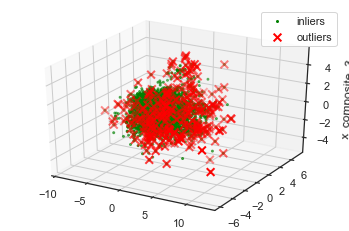

In [109]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(df_total[numeric_cols])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

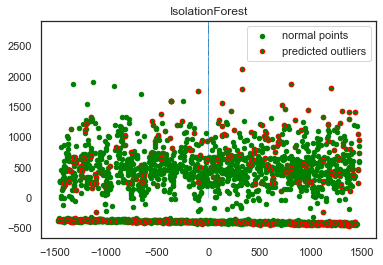

In [110]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df_total[numeric_cols])
res=pd.DataFrame(pca.transform(df_total[numeric_cols]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()